### 1.Расчет описательных статистик

In [8]:
from sys import displayhook

import pandas as pd
def f1 (list):
    sum = 0
    for x in list:
        sum +=x
    return sum/len(list)
def D(list):
    E=f1(list)
    list2=[]
    for x in list:
        list2.append((x-E)**2)
    return f1(list2)



file1 = pd.read_spss("../data/Annual 2005-2011_START.sav")
min_result = []
for col in file1.columns:
    min_result.append(
        {
            "column": col,
            "min" : min(file1[col]),
            "max" : max(file1[col]),
            "dimension": max(file1[col]) - min(file1[col]),
            "mean":f1(file1[col]),
            "var":D(file1[col]),
            "std":D(file1[col])**0.5,
            "q 0.01": file1[col].quantile(0.01),
            "q 0.05": file1[col].quantile(0.05),
            "medium": file1[col].quantile(0.5),
            "q 0.95": file1[col].quantile(0.95),
            "q 0.99": file1[col].quantile(0.99),
        }
    )
table = pd.DataFrame(min_result)
display(table)

,column,min,max,dimension,mean,var,std,q 0.01,q 0.05,medium,q 0.95,q 0.99
0,Cреднеспис.числ.работн,10.000000,28650.000000,28640.000000,1220.773284,6.532789e+06,2555.932151,36.940000,91.000000,473.000000,5152.400000,12526.780000
1,k1,0.248322,18.020148,17.771826,2.002089,2.855216e+00,1.689738,0.423381,0.663925,1.473859,5.258034,9.002944
2,k2,0.000000,7.029135,7.029135,0.238018,2.679111e-01,0.517601,0.000340,0.002725,0.055551,1.128667,2.636539
3,k3,0.008329,11.187699,11.179370,0.825098,8.429465e-01,0.918121,0.061415,0.124851,0.538349,2.544703,4.917381
4,k4,-4.569874,0.935935,5.505809,0.038115,3.906737e-01,0.625039,-2.450093,-0.977473,0.148620,0.755809,0.881929
5,k4_new,NaN,NaN,NaN,NaN,NaN,NaN,-0.873712,-0.225763,0.367201,0.821442,0.896206
6,k5,0.009944,1.083702,1.073758,0.346330,3.919253e-02,0.197971,0.037373,0.068282,0.319908,0.712523,0.860138
7,k6,0.000000,1.000000,1.000000,0.238031,4.539211e-02,0.213054,0.000000,0.000000,0.185185,0.663608,0.859919
8,k7,0.000000,1.000000,1.000000,0.174212,4.982903e-02,0.223224,0.000000,0.000000,0.075676,0.674139,0.890017
9,k8,0.053766,0.990056,0.936290,0.655964,3.831339e-02,0.195738,0.160895,0.292537,0.681890,0.932723,0.962348


### 2. Визуализация распределений

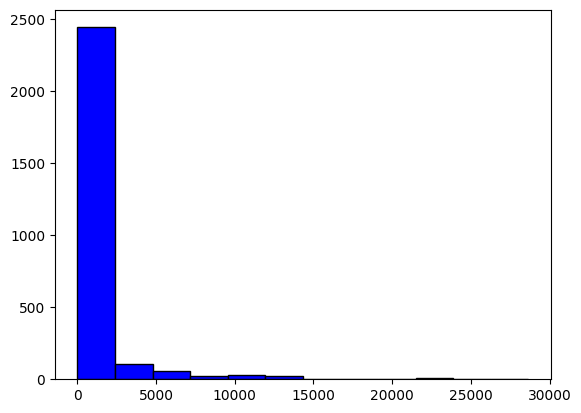

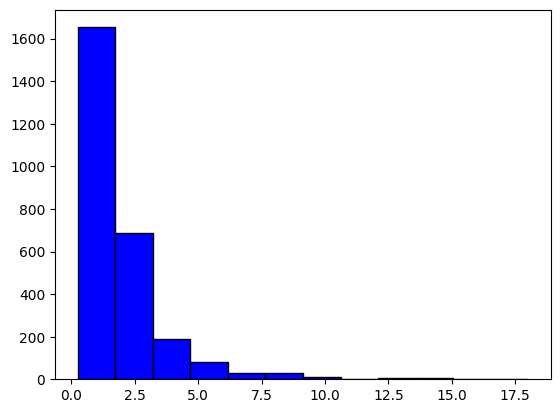

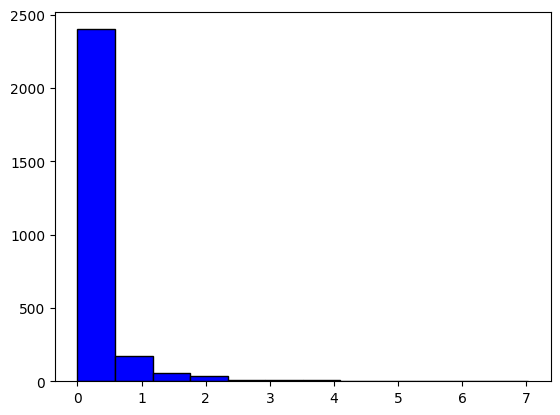

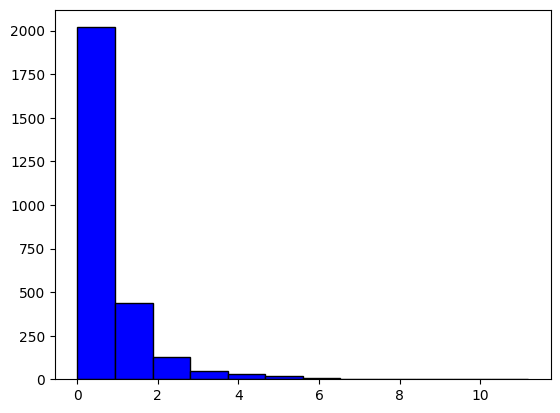

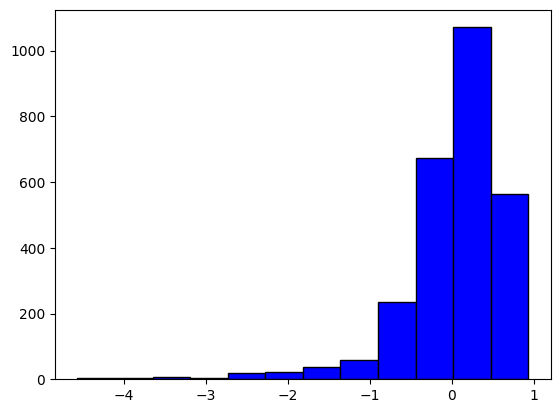

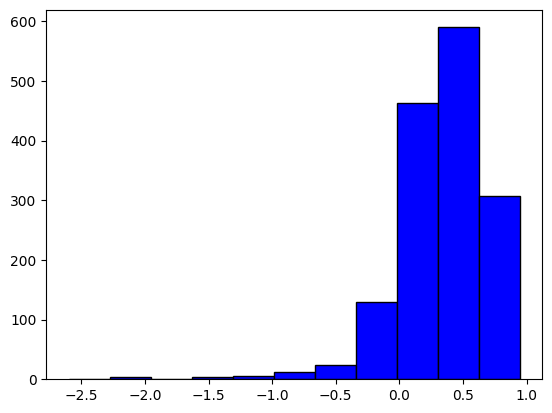

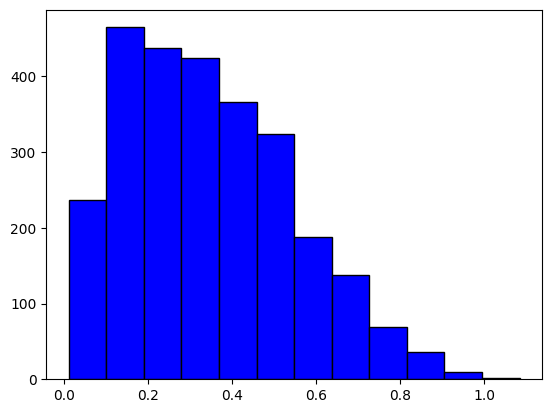

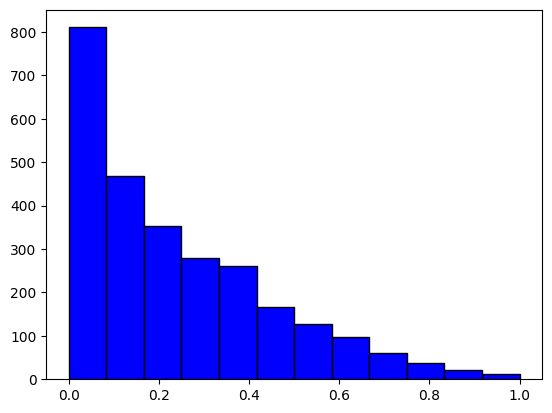

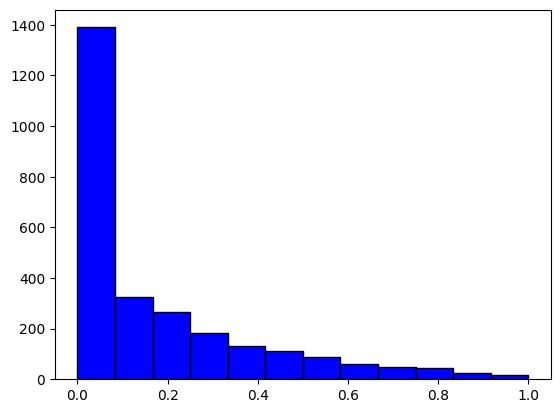

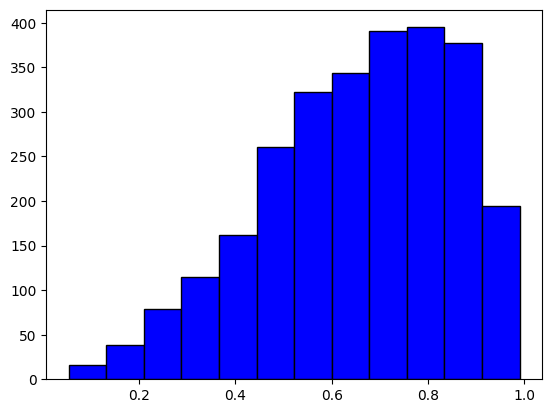

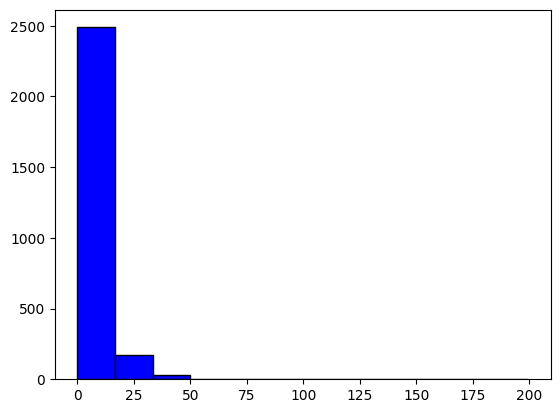

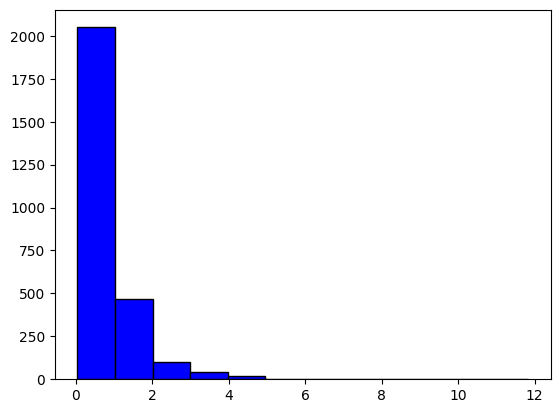

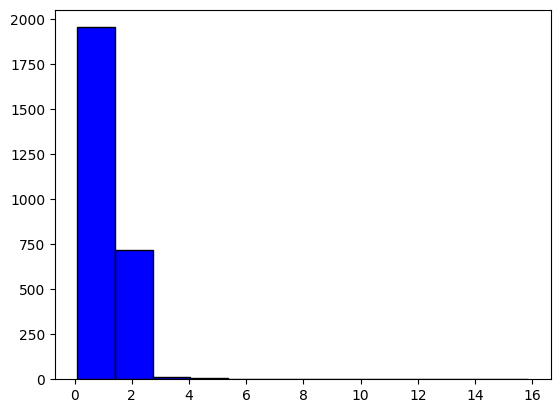

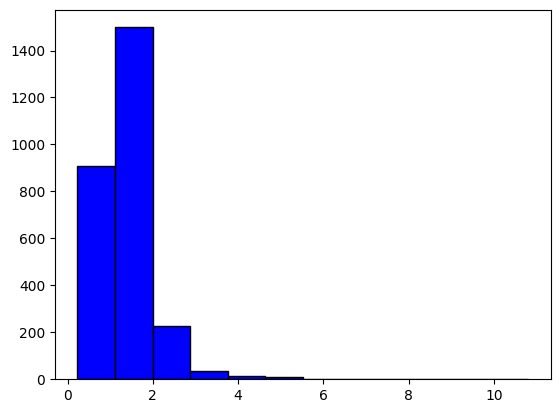

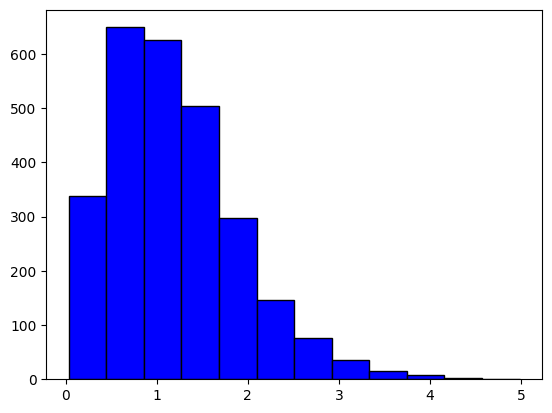

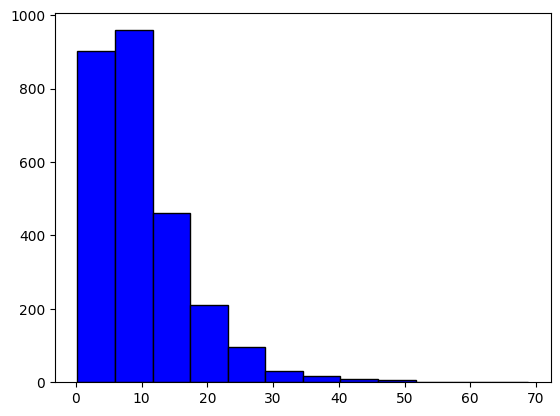

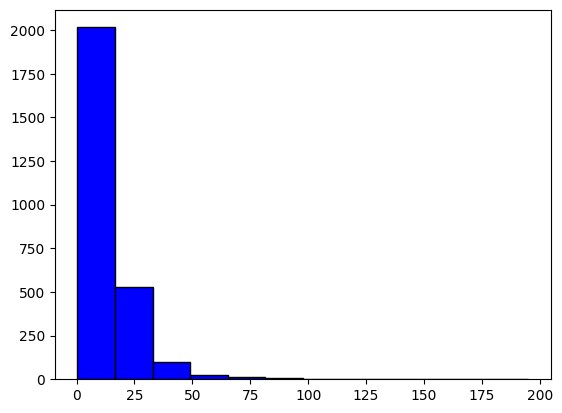

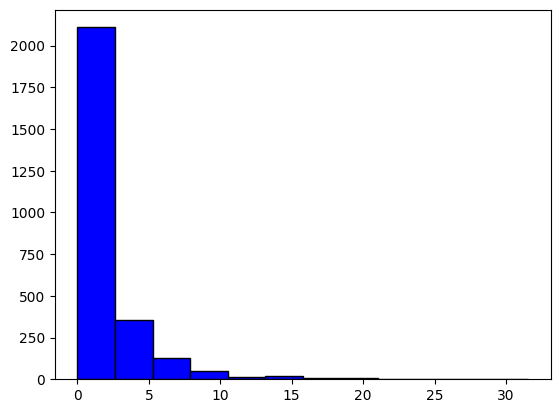

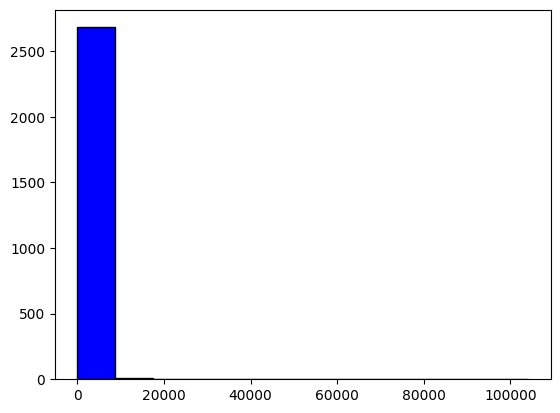

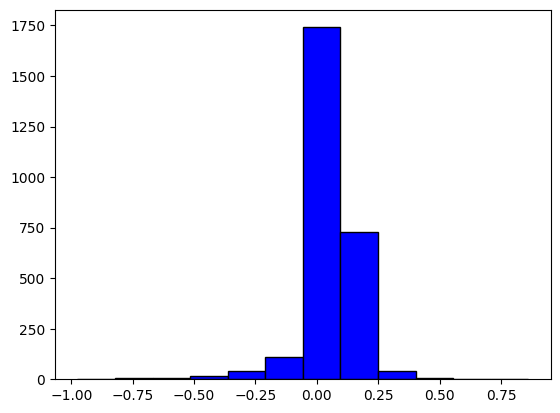

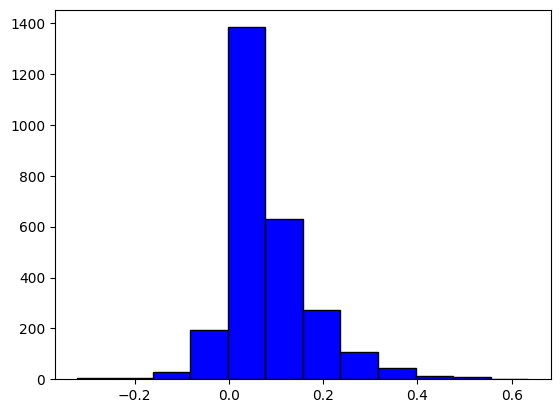

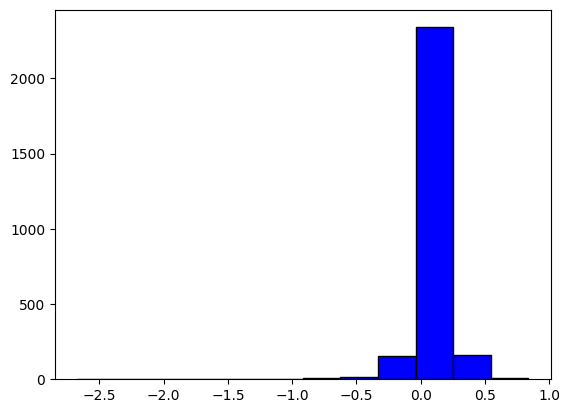

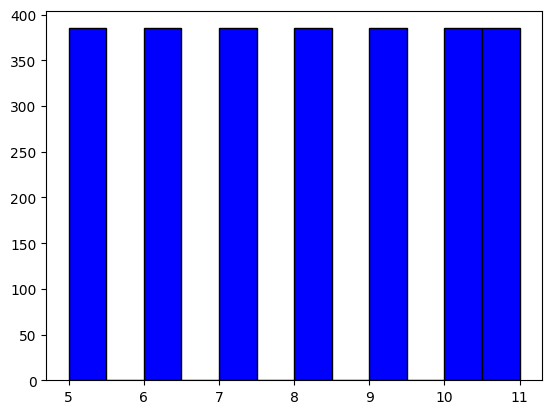

In [15]:
import math
from math import log2
import matplotlib.pyplot as plt


def get_bin(list):
    return math.ceil(log2(len(list)+1))
for col in file1.columns:
    plt.hist(
        file1[col].dropna(),
        bins=get_bin(file1[col].dropna()),
        color='blue',
        edgecolor='black',
    )
    plt.show()



Вывод: подавляющее большинство распределений унимодальные ассиметричные (некоторые со сдвигом влево, некоторые вправо)

### 3. Корреляционный анализ

In [18]:
file1.dropna()
corr = file1.corr(method='pearson')
display(corr)

,Cреднеспис.числ.работн,k1,k2,k3,k4,k4_new,k5,k6,k7,k8,...,k12,k13,k14,k15,k16,k17,k18,k19,k20,Year
Cреднеспис.числ.работн,1.000000,0.035067,0.039541,0.057712,0.008973,0.087344,-0.045174,-0.148917,-0.063621,0.044002,...,0.005375,-0.062109,0.002358,-0.067429,-0.087362,0.056114,0.096272,0.019471,0.017363,-0.001502
k1,0.035067,1.000000,0.732549,0.883032,0.452525,0.657738,-0.412064,-0.113531,-0.248283,0.405975,...,0.038813,0.048098,0.540829,0.023106,-0.256268,0.004299,0.226630,0.313667,0.187206,0.114381
k2,0.039541,0.732549,1.000000,0.812905,0.327937,0.437337,-0.318344,-0.123917,-0.208498,0.317151,...,0.051065,0.040822,0.374173,0.092893,-0.129728,0.013061,0.202906,0.317995,0.185868,0.077838
k3,0.057712,0.883032,0.812905,1.000000,0.398493,0.582403,-0.355593,-0.110743,-0.227242,0.350851,...,0.068067,0.077963,0.492752,-0.083706,-0.303649,0.016845,0.236955,0.344531,0.213435,0.116602
k4,0.008973,0.452525,0.327937,0.398493,1.000000,0.638823,-0.557490,-0.090429,-0.263460,0.556975,...,-0.077811,0.279167,0.338707,0.064928,-0.264211,0.016276,0.415230,0.441954,0.366759,0.010729
k4_new,0.087344,0.657738,0.437337,0.582403,0.638823,1.000000,-0.472056,-0.100721,-0.260371,0.472056,...,0.016751,0.095288,0.374033,-0.030546,-0.352824,0.025994,0.300534,0.403063,0.344076,0.025175
k5,-0.045174,-0.412064,-0.318344,-0.355593,-0.557490,-0.472056,1.000000,0.036943,0.166313,-0.996378,...,0.053309,0.025730,-0.319249,-0.234310,0.054876,-0.047257,-0.178914,-0.245414,-0.152431,0.040350
k6,-0.148917,-0.113531,-0.123917,-0.110743,-0.090429,-0.100721,0.036943,1.000000,0.391975,-0.032126,...,-0.147884,-0.130656,-0.154374,-0.073267,0.075172,-0.014597,-0.243185,-0.225752,-0.219151,-0.116653
k7,-0.063621,-0.248283,-0.208498,-0.227242,-0.263460,-0.260371,0.166313,0.391975,1.000000,-0.161284,...,-0.108884,-0.245651,-0.325492,-0.141712,0.152253,0.007264,-0.292535,-0.329748,-0.279798,-0.084229
k8,0.044002,0.405975,0.317151,0.350851,0.556975,0.472056,-0.996378,-0.032126,-0.161284,1.000000,...,-0.055908,-0.031170,0.316123,0.235426,-0.049662,0.046653,0.176937,0.241966,0.151142,-0.055604


Найдем сильнокреелирующие пары

In [19]:
crit_value = 0.5
result_set = []
for i,col1 in enumerate(corr.columns):
    for j,col2 in enumerate(corr.columns):
        if i<j:
            if abs(corr.loc[col1, col2])>crit_value:
                result_set.append((col1, col2,corr.loc[col1, col2]))
strong_corr_df = pd.DataFrame(result_set, columns=['Column 1', 'Column 2', 'Pearson r'])
display(strong_corr_df)

,Column 1,Column 2,Pearson r
0,k1,k2,0.732549
1,k1,k3,0.883032
2,k1,k4_new,0.657738
3,k1,k9,0.557893
4,k1,k14,0.540829
5,k2,k3,0.812905
6,k3,k4_new,0.582403
7,k3,k9,0.510083
8,k4,k4_new,0.638823
9,k4,k5,-0.557490


Проверим статистическую значимость для сильнокоррелирующих пар

In [20]:
from scipy.stats import pearsonr
stat_proved = []
for col in result_set:
    r,p = pearsonr(file1[col[0]], file1[col[1]])
    if  p<0.05:
        stat_proved.append(col)
display(pd.DataFrame(stat_proved))

,0,1,2
0,k1,k2,0.732549
1,k1,k3,0.883032
2,k1,k9,0.557893
3,k1,k14,0.540829
4,k2,k3,0.812905
5,k3,k9,0.510083
6,k4,k5,-0.557490
7,k4,k8,0.556975
8,k5,k8,-0.996378
9,k9,k14,0.540732


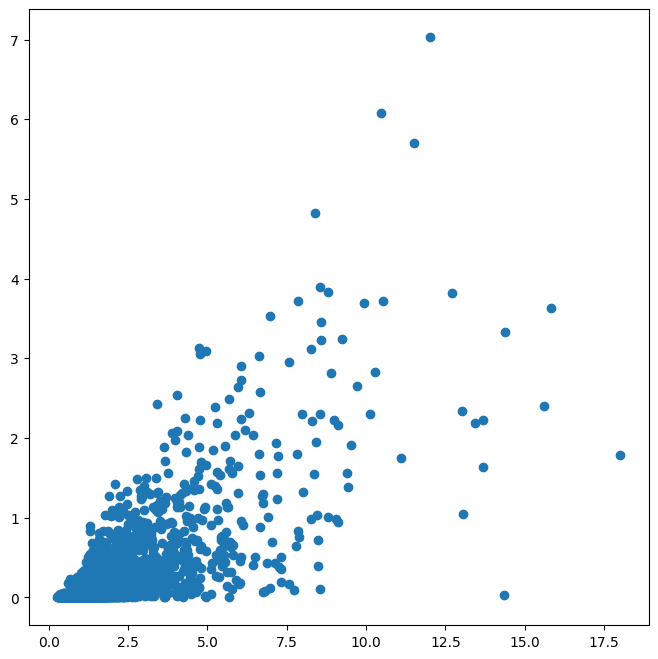

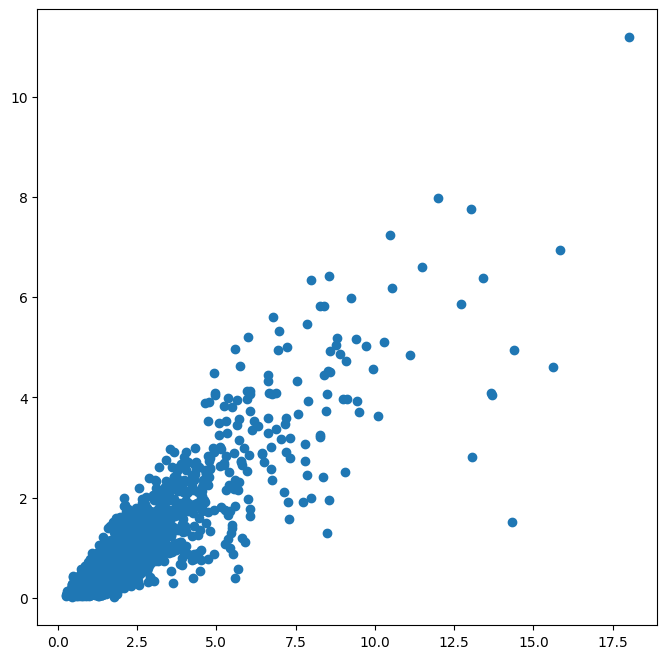

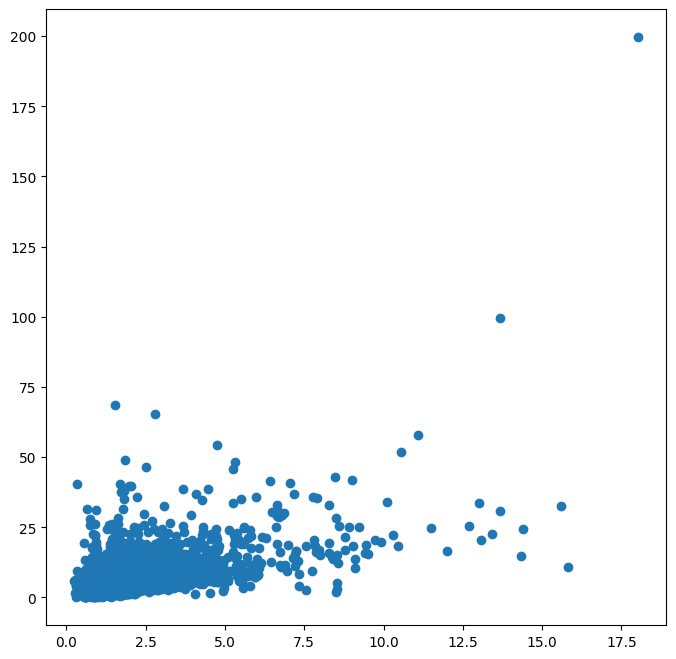

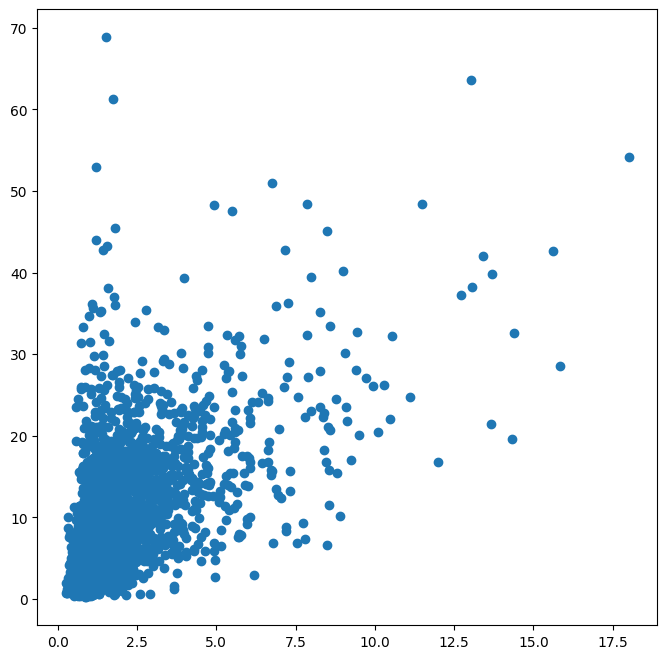

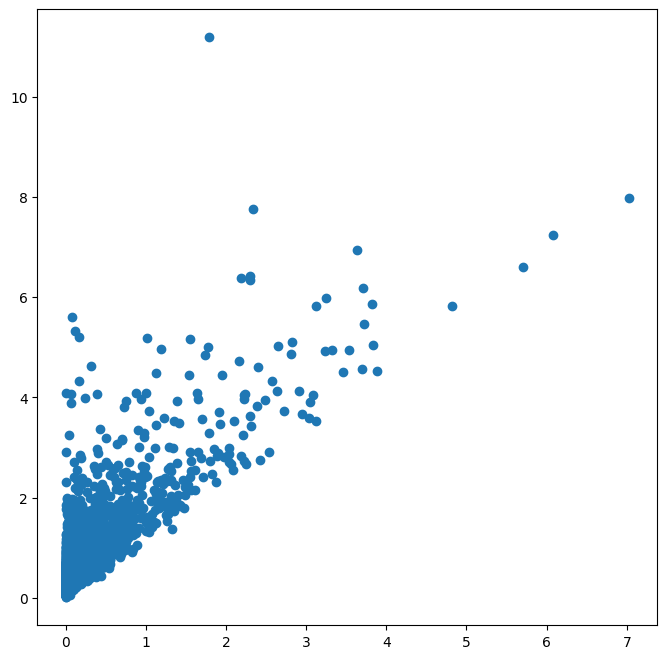

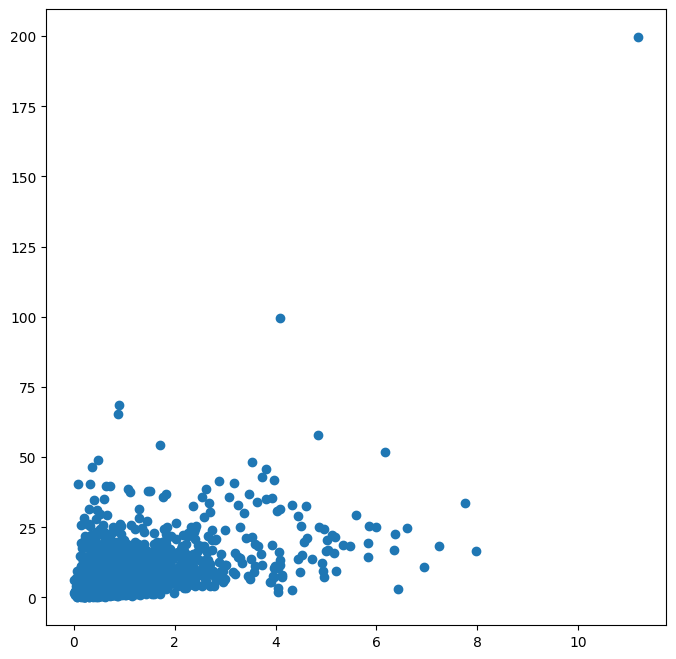

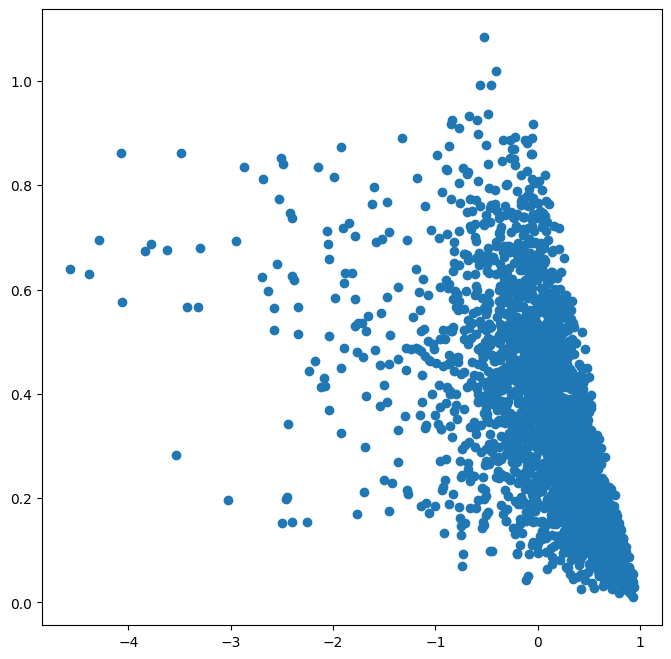

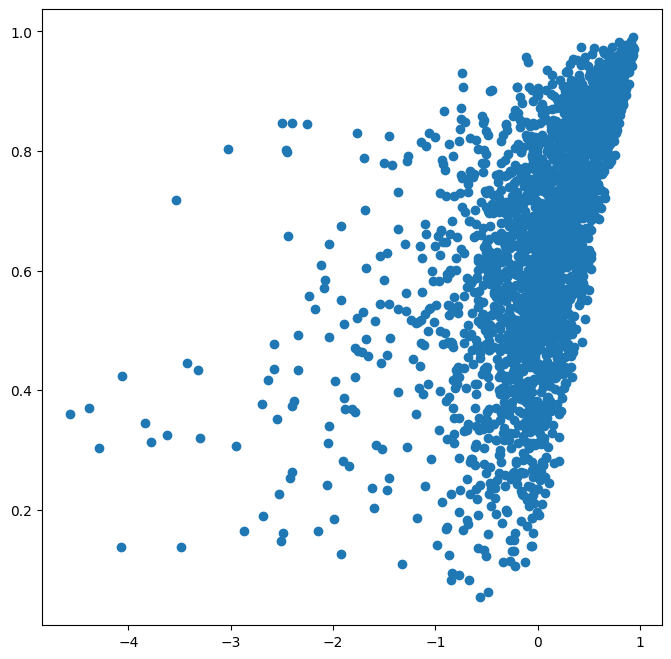

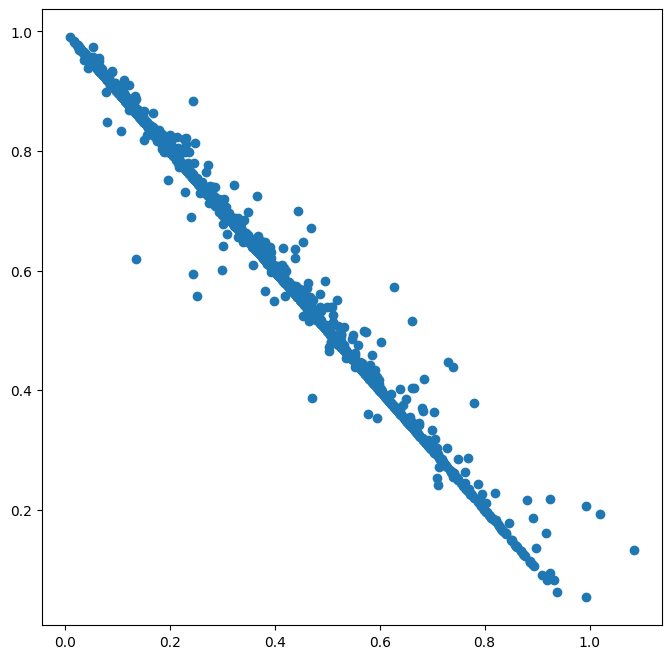

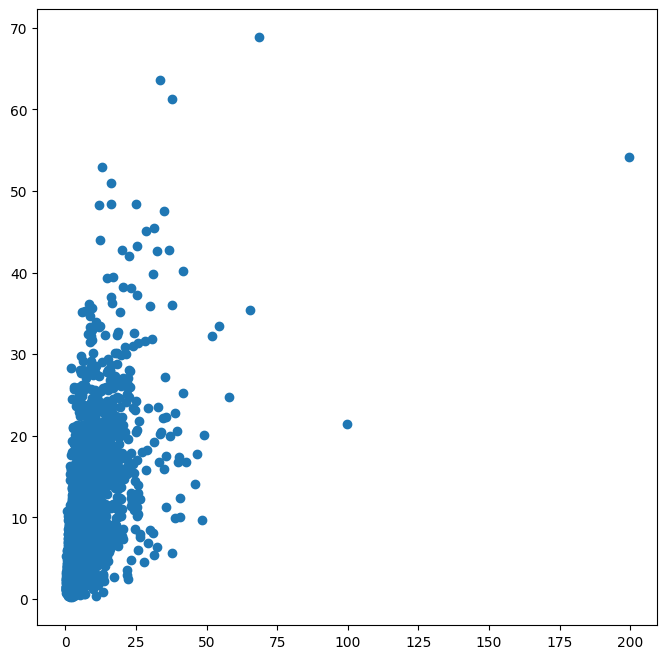

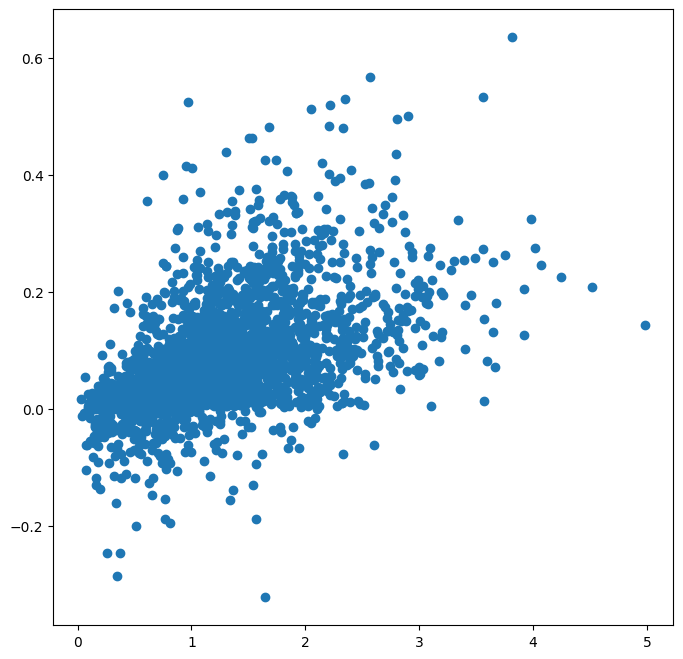

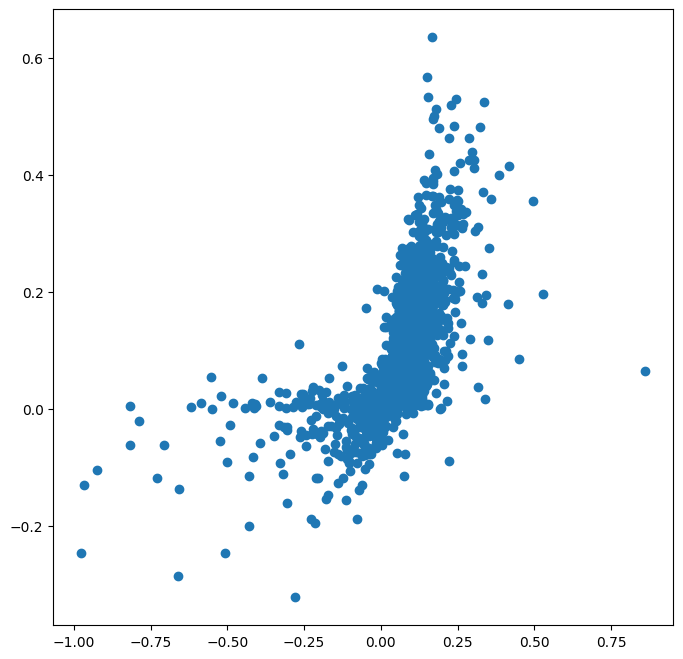

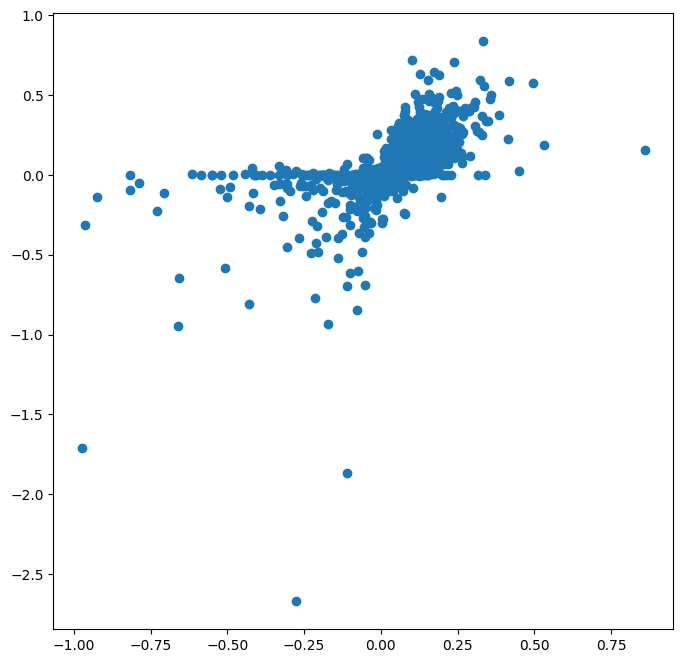

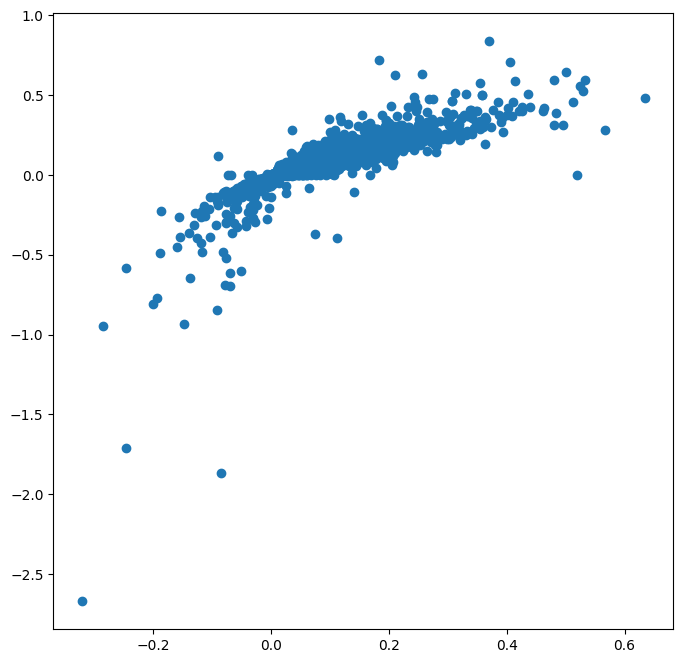

In [21]:
for col in stat_proved:
    col1 = col[0]
    col2 = col[1]
    plt.figure(figsize=(8,8))
    plt.scatter(file1[col1], file1[col2])

Для к8 и к5 выявлена сильная корреляция (близка к -1). Это значит, что статистику к8 можно линейно выразить через к5. Следовательно, к8 можно исключить при дальнейшем анализе. Для всех остальных статистик ярко выраженной линейной зависимости не выявлено.